[View in Colaboratory](https://colab.research.google.com/github/adityasingh1993/100DayMLChallenge/blob/master/Word2VecPersonal_on_FB_Chat.ipynb)

In [0]:
from __future__ import absolute_import, division, print_function
import codecs
import glob
import re
import multiprocessing
import os
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [0]:
book_filenames="message.txt"

In [0]:
import pickle
corpus_raw1=""
with open(book_filenames,"rb") as book_file:
    corpus_raw1=pickle.load(book_file)


In [0]:
print("length of corpus",len(corpus_raw1))

In [0]:
tokenizer=nltk.data.load("tokenizers/punkt/english.pickle")

In [0]:
corpus_raw1[3]

'are bottle nahi sarif ladki hai..:p'

In [0]:
message=""
for i in range(len(corpus_raw1)):
    message+=corpus_raw1[i]+" "

In [0]:
raw_sentences=tokenizer.tokenize(message)

In [0]:
def sentence_to_word_list(raw):
    clean=re.sub("[^a-zA-z]"," ",raw)
    words=clean.split()
    return words

In [0]:
def sentence_to_clean_list(raw):
    clean=re.sub("[^a-zA-z]"," ",raw)
    
    return clean

In [0]:
cleansentence=[]
for rc in corpus_raw1:
    if len(rc)>0:
        cleansentence.append(sentence_to_clean_list(rc))
        

In [0]:
cleansentence[2]

'Tu v chahe to join kr skti no prblm'

In [0]:
sentences=[]
for raw_sentence in raw_sentences:
    if len(raw_sentence)>0:
        sentences.append(sentence_to_word_list(raw_sentence))


In [0]:
print(raw_sentence[3])
print(sentences[2])

l
['Bottle', 'hi', 'dede', 'hmlog', 'kr', 'lenge', 'party', 'nhii', 'milega', 'tumlog', 'jo', 'aho', 'bolo', 'jo', 'aho', 'karo', 'aue', 'upar', 'se', 'party']


In [0]:
print(raw_sentences[5])
print(sentences[5])
jointsentence=[]
for i in range(len(sentences)):
        jointsentence.append(" ".join(sentences[i]))

tumlog itna kanjar ho!!>.
['tumlog', 'itna', 'kanjar', 'ho']


In [0]:
print(sentences[2])
len(sentences)

['Bottle', 'hi', 'dede', 'hmlog', 'kr', 'lenge', 'party', 'nhii', 'milega', 'tumlog', 'jo', 'aho', 'bolo', 'jo', 'aho', 'karo', 'aue', 'upar', 'se', 'party']


9233

In [0]:
token_count=[len(sentence) for sentence in sentences]
print(len(token_count))

9233


In [0]:
num_features=300
min_word_count=3
num_workers=multiprocessing.cpu_count()
context_size=7
downsampling=1e-3
seed=1

In [0]:
personal2vec=w2v.Word2Vec(sg=1,
                        seed=seed,
                        workers=num_workers,
                        size=num_features,
                        min_count=min_word_count,
                        window=context_size,
                        sample=downsampling)

In [0]:
personal2vec.build_vocab(sentences)

In [0]:
print("lenth of vocab",len(personal2vec.wv.vocab))
print(personal2vec.wv.vocab["gandu"])

lenth of vocab 6728
Vocab(count:156, index:234, sample_int:4294967296)


In [0]:
personal2vec.train(sentences,total_words=personal2vec.corpus_count,epochs=4000)

765551541

In [0]:
if not os.path.exists("trainedpersonal"):
    os.makedirs("trainedpersonal")
#thrones2vec.save(os.path.join("trained","w",))
import dill
with open("trainedpersonal/personal2vec.w2v",'wb') as f:
    dill.dump(personal2vec, f)

In [0]:
from sklearn.manifold import TSNE

In [0]:
personal2vec1=w2v.Word2Vec.load("trainedpersonal/personal2vec.w2v")

In [0]:
personal2vec1.wv.vocab["p"]

In [0]:
tsne=TSNE(n_components=2,random_state=0)

In [0]:
all_word_vectors_matrix=personal2vec1.wv.syn0

In [0]:
print(all_word_vectors_matrix)

[[ 0.02712977 -0.07516029  0.01863023 ...,  0.14252341 -0.06397169
  -0.12439929]
 [ 0.02158305  0.01402999  0.11217753 ..., -0.10430796  0.07280566
   0.01481795]
 [ 0.13002841 -0.09701044  0.06626165 ...,  0.06656294 -0.06680412
  -0.05440693]
 ..., 
 [ 0.09880266  0.52580726  0.64314991 ..., -0.32365835 -0.19673729
  -0.02556813]
 [-0.05115364  0.56533325 -0.2347004  ...,  0.13687174  0.56197536
  -0.91205281]
 [-0.01002562  0.49052596 -0.22836405 ..., -0.20563814  0.29438519
   0.01974302]]


In [0]:
all_word_vectors_matrix_2d=tsne.fit_transform(all_word_vectors_matrix)

In [0]:
import dill
with open("trainedpersonal/all_word_vectors_matrix.npy",'wb') as f:
    dill.dump(all_word_vectors_matrix, f)

In [0]:
all_word_vectors_matrix_2d=np.load("trainedpersonal/all_word_vectors_matrix.npy")

In [0]:
points=pd.DataFrame([
    (words,coords[0],coords[1])
    for words,coords in[ (words,all_word_vectors_matrix_2d[personal2vec1.wv.vocab[words].index])
                       for words in personal2vec1.wv.vocab
                      
                      ]
    
    
],columns=["Words","X","Y"])
print("new")

new


In [0]:
points.head(10)

,Words,X,Y
0,University,0.269791,-0.074651
1,agla,0.646787,0.787482
2,hI,0.404991,0.249235
3,aptii,-0.210201,-0.308743
4,kholenge,0.331240,0.001954
5,wake,-0.167095,0.305685
6,biwi,0.337712,0.325033
7,task,0.284019,0.207940
8,Kar,-0.269399,-0.113885
9,daru,0.546017,-0.239746


In [0]:
sb.set_context("poster")

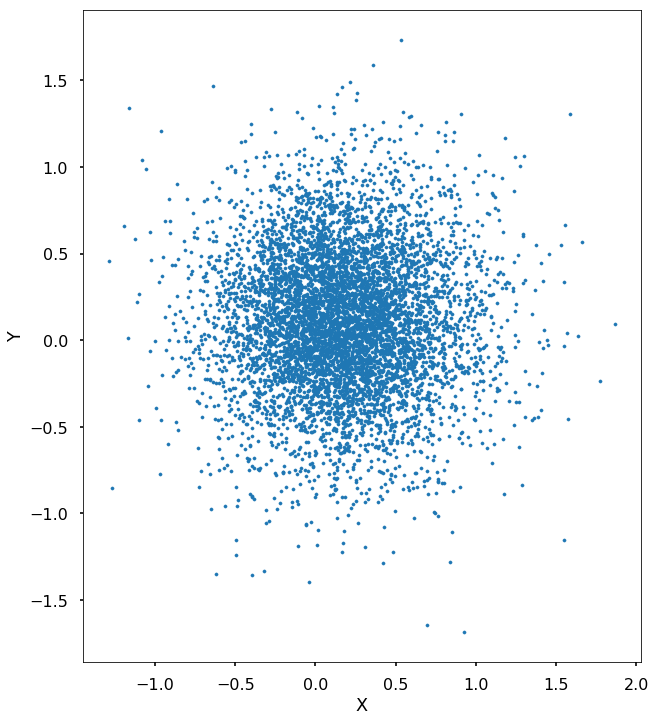

In [0]:
%matplotlib inline
points.plot.scatter("X","Y",s=10,figsize=(10,12))


In [0]:
def plot_zoom_image(x_bounds,y_bounds):
    slice=points[
        (x_bounds[0]<=points.X)&
        (points.X<=x_bounds[1])&
        (y_bounds[0]<points.Y)&
        (points.Y<=y_bounds[1])
    ]
    ax=slice.plot.scatter("X","Y",s=35,figsize=(10,8))
    for i, point in slice.iterrows():
        ax.text(point.X+0.005,point.Y+0.005,point.Words,fontsize=11)

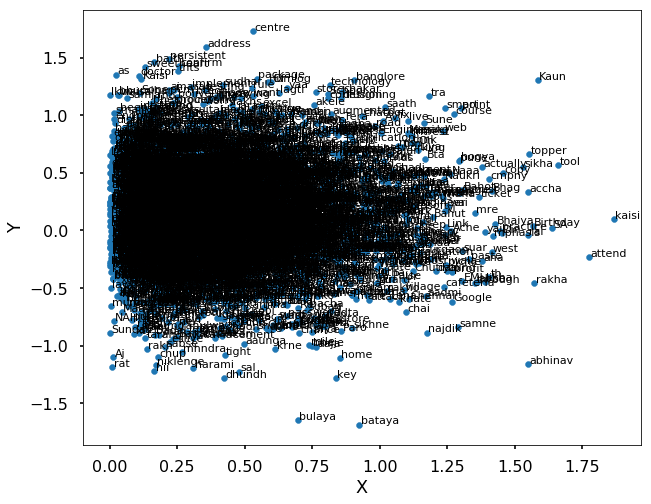

In [0]:
plot_zoom_image(x_bounds=(0,10),y_bounds=(-5,10))

In [0]:
personal2vec1.predict_output_word("meow")

[('w', 0.46886176),
 ('youtube', 0.0096092885),
 ('c', 0.0079274839),
 ('d', 0.0071930494),
 ('facebook', 0.0066315858),
 ('com', 0.0064253486),
 ('o', 0.0062238337),
 ('https', 0.0057383343),
 ('sara', 0.0050000092),
 ('www', 0.0044077951)]

In [0]:
personal2vec1.wv.most_similar("P")

[('hehehehe', 0.28879252076148987),
 ('aihe', 0.2808123230934143),
 ('cam', 0.26556849479675293),
 ('bandi', 0.2655562460422516),
 ('excited', 0.263117253780365),
 ('whts', 0.2624746263027191),
 ('seen', 0.25883734226226807),
 ('animesh', 0.2499234974384308),
 ('cute', 0.24626734852790833),
 ('heart', 0.24468019604682922)]

In [0]:
personal2vec1.wv["p"]

array([  4.41099346e-01,   1.09573871e-01,   4.07547742e-01,
         2.07570463e-01,  -4.34752181e-02,   1.13356858e-01,
         1.75225303e-01,   5.40629804e-01,   1.64466098e-01,
        -4.10555184e-01,   2.68120110e-01,   1.48015052e-01,
        -3.28013636e-02,   5.61205924e-01,  -2.35257581e-01,
        -2.25858122e-01,  -5.25620058e-02,   3.00913546e-02,
         1.67856991e-01,   7.20197856e-02,  -1.19362009e+00,
        -2.17866927e-01,  -2.62672782e-01,   2.63547059e-02,
         6.06442168e-02,  -5.59199154e-01,  -9.02029872e-02,
        -1.42825142e-01,   1.32624432e-01,  -1.77428171e-01,
         9.23503339e-02,   3.66749346e-01,   6.58591449e-01,
        -2.47448117e-01,  -6.14161134e-01,   8.98439527e-01,
        -1.71901703e-01,  -7.06025898e-01,  -1.06678315e-01,
        -5.65070689e-01,   7.85568774e-01,   5.29731214e-01,
         1.90540567e-01,   4.05803055e-01,   1.02714159e-01,
         2.61269808e-01,   1.40429670e-02,   1.32923620e-02,
        -6.18724823e-02,

In [0]:
personal2vec1.wv.index2word[2000]

'jhagra'

In [0]:
personal2vec1.wv.word2index["hi"]

AttributeError: 'EuclideanKeyedVectors' object has no attribute 'word2index'

In [0]:
personal2vec1.save("trainedpersonal/personal2vec")

In [0]:
len(personal2vec1.wv.vocab)

6728

In [0]:
len(cleansentence)

51815

In [0]:
def convert_train_data(filename):
    trainX1=[]
    trainY1=[]
    for i in range(0,len(filename),2):
        trainX1.append(filename[i])
        if i+1<=(len(filename)-1):
            trainY1.append(filename[i+1])
    
       
    return trainX1,trainY1

        

In [0]:
X1,Y1=convert_train_data(cleansentence)

In [0]:
len(X1)

25908

In [0]:
len(Y1)

25907

In [0]:
X1

In [0]:
len(Y1)

25907

In [0]:
del X1[-1]

In [0]:
len(X1)

25907

In [0]:
chatdata={"Request":X1,"Response":Y1}

In [0]:
import pandas as pd

In [0]:
dataframe=pd.DataFrame(chatdata)

In [0]:
filepath="trainedpersonal/chatdata.xlsx"

In [0]:
dataframe.to_excel(filepath,index=True)